C:\Users\55539\AppData\Local\Temp\ipykernel_29960\1152028281.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


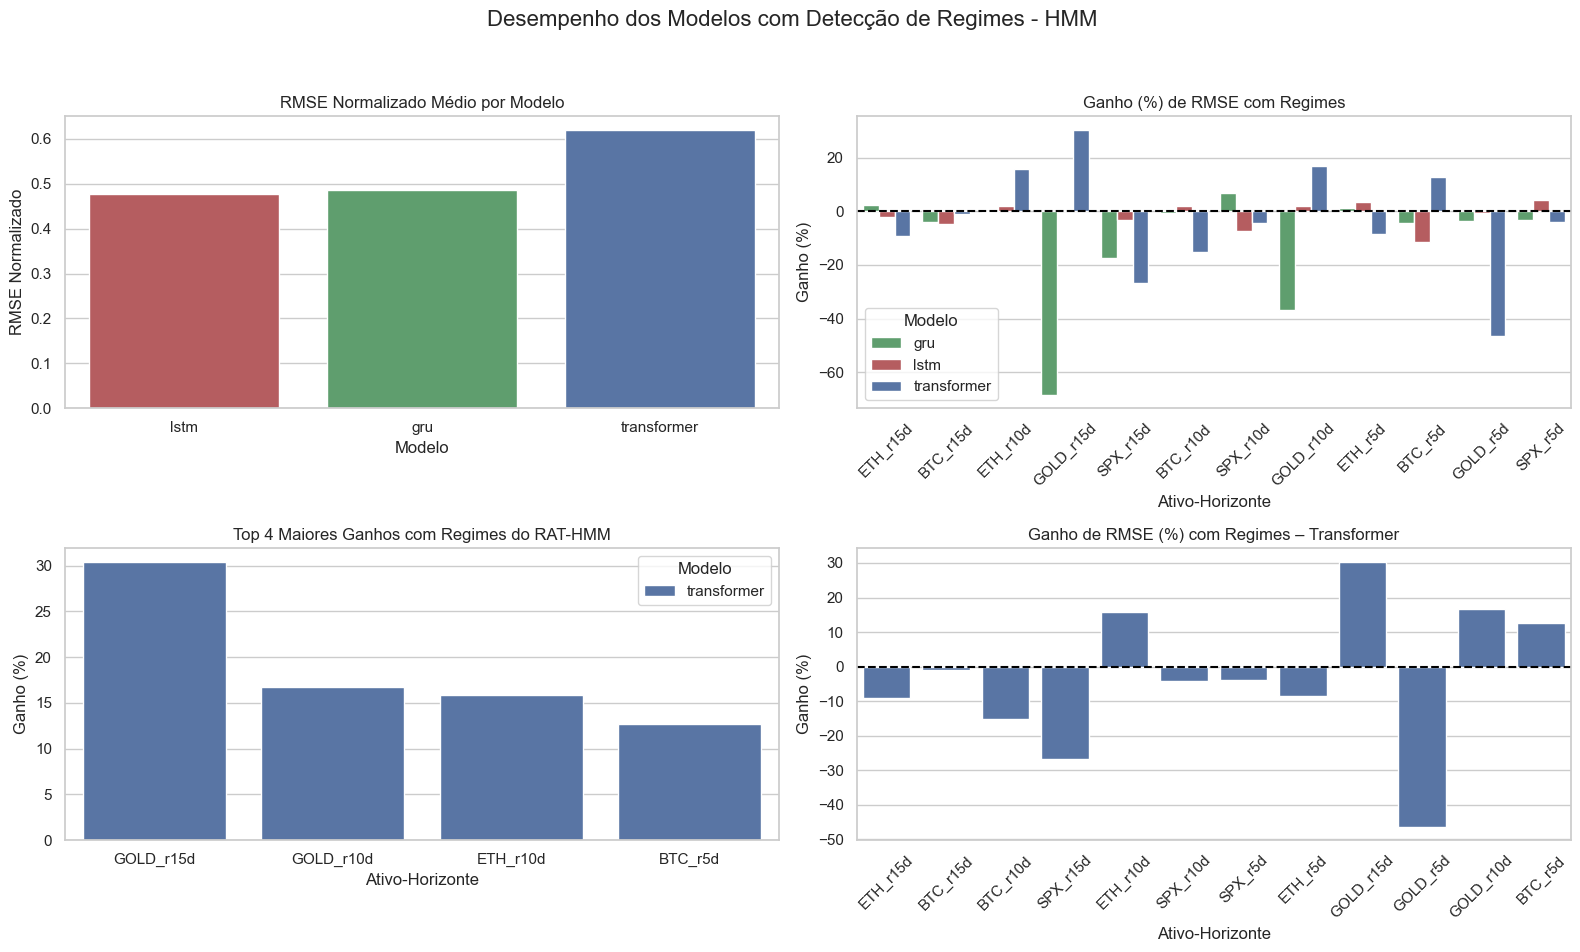

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os arquivos diretamente (caminhos reais no seu sistema local)
model_ranking = pd.read_csv("data/analysis/model_ranking.csv")
summary_comparison = pd.read_csv("data/results/summary_comparison.csv")
top_regimes = pd.read_csv("data/results/top_regimes.csv")
summary_comparison_transformer = pd.read_csv("data/results/summary_comparison_transformer_cleaned.csv")

# Estilo do seaborn
sns.set(style="whitegrid")

# Paleta de cores fixa para consistência visual
custom_palette = {
    "Baseline": "#4C72B0",
    "Com Regime": "#55A868",
    "transformer": "#4C72B0",
    "gru": "#55A868",
    "lstm": "#C44E52"
}

# Criar figura com 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Desempenho dos Modelos com Detecção de Regimes - HMM", fontsize=16)

# Gráfico 1: RMSE médio normalizado por tipo de modelo
sns.barplot(
    ax=axes[0, 0],
    data=model_ranking,
    x="model_type",
    y="rmse_norm",
    palette=custom_palette
)
axes[0, 0].set_title("RMSE Normalizado Médio por Modelo")
axes[0, 0].set_ylabel("RMSE Normalizado")
axes[0, 0].set_xlabel("Modelo")

# Gráfico 2: Ganho percentual de RMSE com regimes (todos os modelos)
sns.barplot(
    ax=axes[0, 1],
    data=summary_comparison,
    x="target_col",
    y="rmse_gain_%",
    hue="model_type",
    dodge=True,
    palette=custom_palette
)
axes[0, 1].axhline(0, linestyle="--", color="black")
axes[0, 1].set_title("Ganho (%) de RMSE com Regimes")
axes[0, 1].set_ylabel("Ganho (%)")
axes[0, 1].set_xlabel("Ativo-Horizonte")
axes[0, 1].tick_params(axis="x", rotation=45)
axes[0, 1].legend(title="Modelo")

# Gráfico 3: Top 4 maiores ganhos com regimes
top4 = top_regimes.nlargest(4, "rmse_gain_%")
sns.barplot(
    ax=axes[1, 0],
    data=top4,
    x="target_col",
    y="rmse_gain_%",
    hue="model_type",
    dodge=True,
    palette=custom_palette
)
axes[1, 0].set_title("Top 4 Maiores Ganhos com Regimes do RAT-HMM")
axes[1, 0].set_ylabel("Ganho (%)")
axes[1, 0].set_xlabel("Ativo-Horizonte")
axes[1, 0].legend(title="Modelo")

# Gráfico 4: Apenas Transformer - Ganho de RMSE
sns.barplot(
    ax=axes[1, 1],
    data=summary_comparison_transformer,
    x="target_col",
    y="rmse_gain_%",
    color=custom_palette["transformer"]
)
axes[1, 1].axhline(0, linestyle="--", color="black")
axes[1, 1].set_title("Ganho de RMSE (%) com Regimes – Transformer")
axes[1, 1].set_ylabel("Ganho (%)")
axes[1, 1].set_xlabel("Ativo-Horizonte")
axes[1, 1].tick_params(axis="x", rotation=45)

# Ajustar layout geral
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


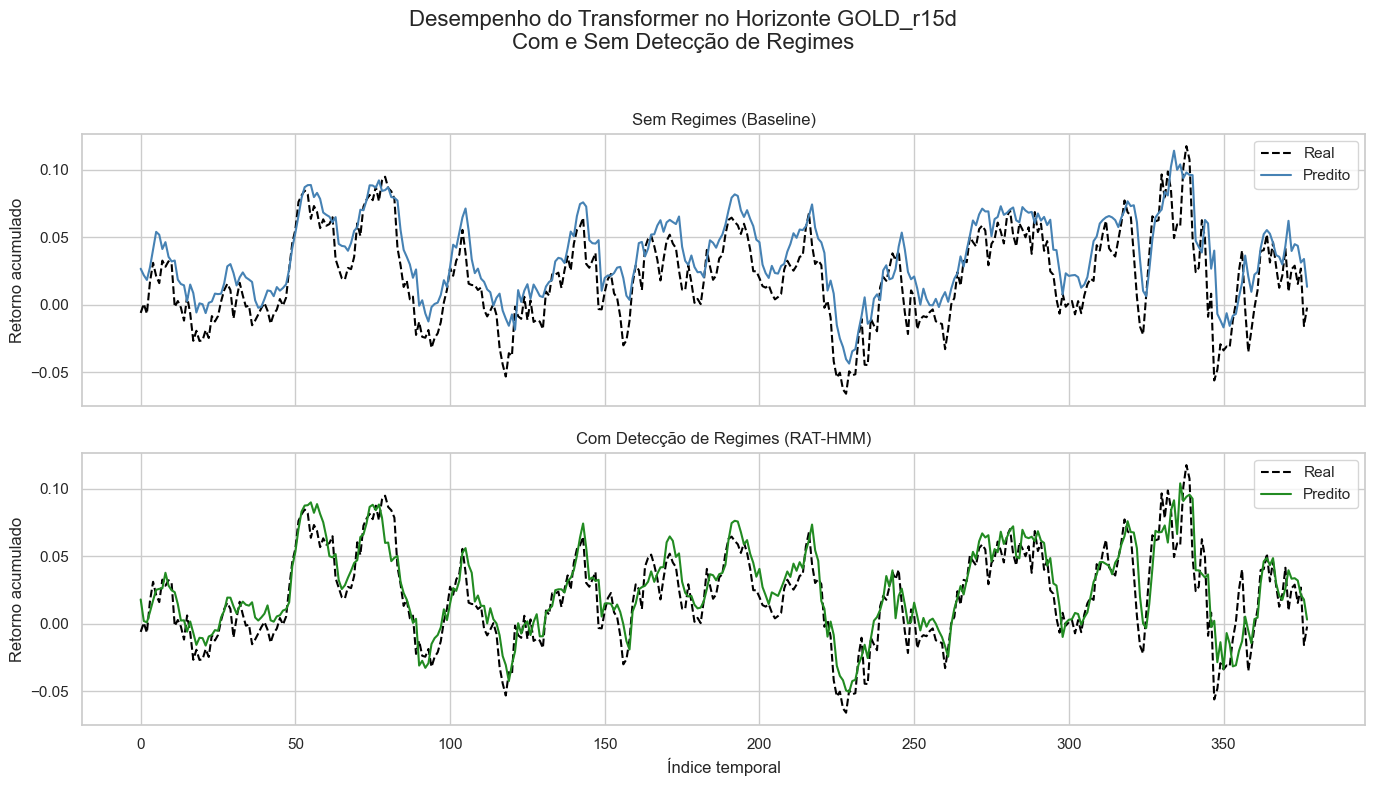

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo do Seaborn
sns.set(style="whitegrid")

# Carregar os dados
df_baseline = pd.read_csv("data/results/backtest_transformer_baseline_GOLD_r15d.csv")
df_regime = pd.read_csv("data/results/backtest_transformer_regime_GOLD_r15d.csv.csv")

# Criar o gráfico com subplots verticais
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
fig.suptitle("Desempenho do Transformer no Horizonte GOLD_r15d\nCom e Sem Detecção de Regimes", fontsize=16)

# Gráfico 1: Sem detecção de regimes (Baseline)
axes[0].plot(df_baseline.index, df_baseline["y_true"], label="Real", linestyle="--", color="black")
axes[0].plot(df_baseline.index, df_baseline["y_pred"], label="Predito", color="steelblue")
axes[0].set_title("Sem Regimes (Baseline)")
axes[0].set_ylabel("Retorno acumulado")
axes[0].legend()

# Gráfico 2: Com detecção de regimes (RAT-HMM)
axes[1].plot(df_regime.index, df_regime["y_true"], label="Real", linestyle="--", color="black")
axes[1].plot(df_regime.index, df_regime["y_pred"], label="Predito", color="forestgreen")
axes[1].set_title("Com Detecção de Regimes (RAT-HMM)")
axes[1].set_ylabel("Retorno acumulado")
axes[1].set_xlabel("Índice temporal")
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
